<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:35%"><img src='https://dl.dropbox.com/s/qtzukmzqavebjd2/icon_smu.jpg' style="width: 300px; height: 90px; "></th>
        <th style="text-align:center;"><h3>ACCT649 - More EDA on Pandas, Python</h3></th>
    </tr>
</table>
*References - Python for Data Analysis- Data Wrangling with Pandas, NumPy,and IPython - Wes McKinney; O'REILLY <br></br>
*Michael Heydt-Mastering pandas for Finance- Master pandas, an open source Python Data Analysis Library, for financial data analysis-Packt Publishing (2015)

In today's class, we'll be using the `REALIS` dataset released by `URA, Singpore` (requires a subscription, however, students of SMU can download it from SMU library). The dataset contains realestate property sale transactions in for 6 months ranging from March till September 2019) - it captures details such as `project name`, `transacted price`, `sale date` etc. The entire dataset is horizontally splitted into 7 different csv files. Open the csv files to inspect and get an overall idea of the fields presented for each property that was sold.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

### Q1:
 
Import the csv files ranging from `1.csv` to `7.csv` to a single dataframe object.
In the previous classes, we imported only a single dataset at a time, however, it's very common that when you deal with larger datasets, you divide them as multiple csv files and merge as dataframe in Python. Use the head() to display the first 10 rows.

Hint: You can use `map()` to repeatedly execute a function to all the item specified in the iterables (this is equivalent to a for-loop). The usage of this function is as follows:
map(function_name, iterables)

E.g:
```
def my_func(n):
    return len(n)

x = map(my_func, ('ACCT649', 'Python', 'smu_soa'))
print(x)
```
The code above will print the length of each words in the tupple and returns a list [7, 6, 7]

In [2]:
# Folder / directory that contains the CSV files
path = './SMUREALIS'

# This list will store the filenames, including paths
filepaths = []

# For each integer, 1 inclusive to 8 exclusive
for i in range(1,8):
    
    # Create a filename, e.g. './SMUREALIS/1.csv'
    filename = path + '/' + str(i) + '.csv'
    
    # Append filename to list
    filepaths.append(filename)

# Read many files, then concatenate them into one DataFrame
df = pd.concat(map(pd.read_csv, filepaths))

# Show first 10 rows
df.head(10)

,Project Name,Address,No. of Units,Area (sqm),Type of Area,Transacted Price ($),Nett Price($),Unit Price ($ psm),Unit Price ($ psf),Sale Date,Property Type,Tenure,Completion Date,Type of Sale,Purchaser Address Indicator,Postal District,Postal Sector,Postal Code,Planning Region,Planning Area
0,THE PETALS,93 Hillview Avenue #10-22,1,177,Strata,1420000,-,8023,745,28-SEP-2018,Condominium,Freehold,2002,Resale,Private,23,66,669626,West Region,Bukit Batok
1,JUBILEE RESIDENCE,353 Pasir Panjang Road #02-03,1,46,Strata,690000,-,15000,1394,28-SEP-2018,Apartment,Freehold,2008,Resale,Private,5,11,118695,Central Region,Queenstown
2,LIRIA TERRACE,33 Mariam Walk,1,150,Land,2300000,-,15333,1425,28-SEP-2018,Terrace House,Freehold,1997,Resale,HDB,17,50,507154,East Region,Pasir Ris
3,3 ORCHARD BY-THE-PARK,3 Orchard Boulevard #22-03,1,210,Strata,8540000,-,40667,3778,28-SEP-2018,Condominium,Freehold,2017,Resale,Private,10,24,248653,Central Region,Orchard
4,3 ORCHARD BY-THE-PARK,3 Orchard Boulevard #23-03,1,210,Strata,8602000,-,40962,3805,28-SEP-2018,Condominium,Freehold,2017,Resale,Private,10,24,248653,Central Region,Orchard
5,HILLSTA,68 Phoenix Road #08-13,1,70,Strata,850000,-,12143,1128,28-SEP-2018,Condominium,99 Yrs From 03/10/2011,2016,Resale,Private,23,66,668202,West Region,Bukit Batok
6,PRINCETON VALE,8 Poh Huat Terrace,1,155,Land,1780000,-,11462,1065,28-SEP-2018,Terrace House,99 Yrs From 04/12/1996,2001,Resale,HDB,19,54,545133,North East Region,Hougang
7,QUEENS,12 Stirling Road #10-08,1,131,Strata,1745000,-,13321,1238,28-SEP-2018,Condominium,99 Yrs From 16/02/1998,2002,Resale,HDB,3,14,148955,Central Region,Queenstown
8,THE CLEARWATER,6 Bedok Reservoir View #13-18,1,125,Strata,1350000,-,10800,1003,28-SEP-2018,Condominium,99 Yrs From 18/07/1997,2001,Resale,HDB,16,47,479234,East Region,Bedok
9,AVILA GARDENS,17 Flora Road #07-05,1,83,Strata,785000,-,9458,879,28-SEP-2018,Condominium,Freehold,1995,Resale,HDB,17,50,509735,East Region,Pasir Ris


### Q2:
Print the `shape`, `name of the columns` and `data types` of the columns (use attribute `dtypes` of DataFrame).

In [3]:
# Show dimensions of dataset
print(df.shape)

# Show column names
print(df.columns)

# Show data types of columns
print(df.dtypes)

(6897, 20)
Index(['Project Name', 'Address', 'No. of Units', 'Area (sqm)', 'Type of Area',
       'Transacted Price ($)', 'Nett Price($)', 'Unit Price ($ psm)',
       'Unit Price ($ psf)', 'Sale Date', 'Property Type', 'Tenure',
       'Completion Date', 'Type of Sale', 'Purchaser Address Indicator',
       'Postal District', 'Postal Sector', 'Postal Code', 'Planning Region',
       'Planning Area'],
      dtype='object')
Project Name                   object
Address                        object
No. of Units                    int64
Area (sqm)                      int64
Type of Area                   object
Transacted Price ($)            int64
Nett Price($)                  object
Unit Price ($ psm)              int64
Unit Price ($ psf)              int64
Sale Date                      object
Property Type                  object
Tenure                         object
Completion Date                object
Type of Sale                   object
Purchaser Address Indicator    object
Pos

### Q3:
Use the `unique()` to display the 'unique' property types and planning region.

In [4]:
# Show all possible values of column 'Property Type'
print(df['Property Type'].unique())

# Show all possible values of column 'Planning Region'
print(df['Planning Region'].unique())

['Condominium' 'Apartment' 'Terrace House' 'Detached House'
 'Executive Condominium' 'Semi-Detached House']
['West Region' 'Central Region' 'East Region' 'North East Region'
 'North Region']


### Q4:
Show the rows where exactly a single unit is sold in properties `Condominium` or `Apartment`.

In [5]:
# Find rows where 'No. of Units' is 1 AND either
# ('Property Type' is 'Condominium' OR 'Apartment')
df1 = df[(df['No. of Units'] == 1) & ((df['Property Type'] == 'Condominium') | (df['Property Type'] == 'Apartment'))]
df1

,Project Name,Address,No. of Units,Area (sqm),Type of Area,Transacted Price ($),Nett Price($),Unit Price ($ psm),Unit Price ($ psf),Sale Date,Property Type,Tenure,Completion Date,Type of Sale,Purchaser Address Indicator,Postal District,Postal Sector,Postal Code,Planning Region,Planning Area
0,THE PETALS,93 Hillview Avenue #10-22,1,177,Strata,1420000,-,8023,745,28-SEP-2018,Condominium,Freehold,2002,Resale,Private,23,66,669626,West Region,Bukit Batok
1,JUBILEE RESIDENCE,353 Pasir Panjang Road #02-03,1,46,Strata,690000,-,15000,1394,28-SEP-2018,Apartment,Freehold,2008,Resale,Private,5,11,118695,Central Region,Queenstown
3,3 ORCHARD BY-THE-PARK,3 Orchard Boulevard #22-03,1,210,Strata,8540000,-,40667,3778,28-SEP-2018,Condominium,Freehold,2017,Resale,Private,10,24,248653,Central Region,Orchard
4,3 ORCHARD BY-THE-PARK,3 Orchard Boulevard #23-03,1,210,Strata,8602000,-,40962,3805,28-SEP-2018,Condominium,Freehold,2017,Resale,Private,10,24,248653,Central Region,Orchard
5,HILLSTA,68 Phoenix Road #08-13,1,70,Strata,850000,-,12143,1128,28-SEP-2018,Condominium,99 Yrs From 03/10/2011,2016,Resale,Private,23,66,668202,West Region,Bukit Batok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,MODENA,39 Simei Street 4 #02-22,1,142,Strata,1400000,-,9859,916,02-APR-2018,Condominium,99 Yrs From 06/12/1997,2001,Resale,Private,18,52,529871,East Region,Tampines
892,ASCENTIA SKY,3 Alexandra View #29-09,1,88,Strata,1700000,-,19318,1795,02-APR-2018,Condominium,99 Yrs From 26/03/2008,2013,Resale,Private,3,15,158749,Central Region,Bukit Merah
894,RIVERSAILS,10 Upper Serangoon Crescent #05-29,1,103,Strata,1080000,-,10485,974,02-APR-2018,Condominium,99 Yrs From 07/12/2011,2016,Resale,HDB,19,53,534031,North East Region,Hougang
895,SKYSUITES@ANSON,8 Enggor Street #16-01,1,34,Strata,938000,-,27588,2563,02-APR-2018,Apartment,99 Yrs From 18/02/2008,2014,Resale,Private,2,7,79718,Central Region,Downtown Core


In [6]:
# Run this code on your resultant dataset, for checking purposes

# Show all possible values for 'No. of Units' - there should only be "1"
print(df1['No. of Units'].unique())

# Show all possible values for 'Property Type' - there should only be "Apartment" and "Condominium"
print(df1['Property Type'].unique())

# Show dimensions of dataset - it should be 5616 x 20
print(df1.shape)

[1]
['Condominium' 'Apartment']
(5616, 20)


### Q5:
Create a new dataframe called df2 that keeps only the following columns of the original dataframe:

`Project Name, Area (sqm), Transacted Price ($), Unit Price ($ psm), Sale Date, Property Type, Tenure, Completion Date, Planning Region, Planning Area`

In [7]:
# Keep only some of the columns
df2 = df[['Project Name', 'Area (sqm)', 'Transacted Price ($)', 'Unit Price ($ psm)', 'Sale Date', 'Property Type', 'Tenure', 'Completion Date', 'Planning Region', 'Planning Area']]

# Show first 5 rows
df2.head()

,Project Name,Area (sqm),Transacted Price ($),Unit Price ($ psm),Sale Date,Property Type,Tenure,Completion Date,Planning Region,Planning Area
0,THE PETALS,177,1420000,8023,28-SEP-2018,Condominium,Freehold,2002,West Region,Bukit Batok
1,JUBILEE RESIDENCE,46,690000,15000,28-SEP-2018,Apartment,Freehold,2008,Central Region,Queenstown
2,LIRIA TERRACE,150,2300000,15333,28-SEP-2018,Terrace House,Freehold,1997,East Region,Pasir Ris
3,3 ORCHARD BY-THE-PARK,210,8540000,40667,28-SEP-2018,Condominium,Freehold,2017,Central Region,Orchard
4,3 ORCHARD BY-THE-PARK,210,8602000,40962,28-SEP-2018,Condominium,Freehold,2017,Central Region,Orchard


In [8]:
# Show dimensions of dataset - it should be 6897 x 10
df2.shape

(6897, 10)

### Q6:
Examine the unique values of property `Tenure` given in the df2 dataframe.
Now create a new dataframe called df3 where the 'Tenure' column is changed so that any properties that are not 'Freehold' will become '99 yrs lease'.

In [9]:
# Show all possible values of 'Tenure' column
df2['Tenure'].unique()

array(['Freehold', '99 Yrs From 03/10/2011', '99 Yrs From 04/12/1996',
       '99 Yrs From 16/02/1998', '99 Yrs From 18/07/1997',
       '99 Yrs From 10/12/2007', '99 Yrs From 14/08/2000',
       '99 Yrs From 20/01/2004', '103 Yrs From 28/11/2002',
       '99 Yrs From 22/03/1997', '99 Yrs From 21/08/2012',
       '99 Yrs From 31/12/2007', '99 Yrs From 01/06/2011',
       '99 Yrs From 10/07/2013', '99 Yrs From 04/06/2012',
       '99 Yrs From 22/09/2008', '99 Yrs From 25/06/2008',
       '99 Yrs From 26/03/2008', '99 Yrs From 12/06/1996',
       '99 Yrs From 20/09/2010', '99 Yrs From 25/04/2012',
       '99 Yrs From 03/08/2006', '99 Yrs From 07/04/2008',
       '99 Yrs From 23/10/2006', '99 Yrs From 12/09/2000',
       '99 Yrs From 05/11/2012', '99 Yrs From 22/01/2003',
       '99 Yrs From 26/02/2004', '99 Yrs From 17/05/1997',
       '99 Yrs From 01/05/1994', '99 Yrs From 08/04/2010',
       '99 Yrs From 14/09/2010', '99 Yrs From 29/11/2000',
       '99 Yrs From 03/09/2012', '99 Yrs Fr

In [10]:
# Copy df2 to another dataset df3
df3 = df2.copy()

# For all rows whose 'Tenure' value is not 'Freehold',
# change it to '99 yrs lease'
df3.loc[df3['Tenure'] != 'Freehold', 'Tenure'] = '99 yrs lease'

# Show first 10 rows
print(df3.head(10))
print(100*'-')

# Show all possible values for 'Tenure' column
print(df3['Tenure'].unique())

            Project Name  Area (sqm)  Transacted Price ($)  \
0             THE PETALS         177               1420000   
1      JUBILEE RESIDENCE          46                690000   
2          LIRIA TERRACE         150               2300000   
3  3 ORCHARD BY-THE-PARK         210               8540000   
4  3 ORCHARD BY-THE-PARK         210               8602000   
5                HILLSTA          70                850000   
6         PRINCETON VALE         155               1780000   
7                 QUEENS         131               1745000   
8         THE CLEARWATER         125               1350000   
9          AVILA GARDENS          83                785000   

   Unit Price ($ psm)    Sale Date  Property Type        Tenure  \
0                8023  28-SEP-2018    Condominium      Freehold   
1               15000  28-SEP-2018      Apartment      Freehold   
2               15333  28-SEP-2018  Terrace House      Freehold   
3               40667  28-SEP-2018    Condominium

### Q7:
Print all the details (i.e., entire row) of the property with the highest transacted price from the df3 dataframe.

In [11]:
# Get the maximum value in 'Transacted Price ($)' column
max_price = df3['Transacted Price ($)'].max()

# Show the row that has this maximum transacted price
df3[df3['Transacted Price ($)'] == max_price]

,Project Name,Area (sqm),Transacted Price ($),Unit Price ($ psm),Sale Date,Property Type,Tenure,Completion Date,Planning Region,Planning Area
238,TULIP GARDEN,35574,906889000,25493,12-APR-2018,Condominium,Freehold,1985,Central Region,Bukit Timah


### Q8:
Currently, the type of `Sale Date` column is marked as `object`. Use df3 and change it to `datetime` object so that we can compute the age of the property at the time of sales.
Hint: You can use `to_datetime()` to do the conversion of a column's data type into a datetime object. 

In [12]:
# Convert data type of column 'Sale Date' from object to datetime
df3['Sale Date'] = pd.to_datetime(df3['Sale Date'], format='%d-%b-%Y')

# Show data types of columns
print(df3.dtypes)

Project Name                    object
Area (sqm)                       int64
Transacted Price ($)             int64
Unit Price ($ psm)               int64
Sale Date               datetime64[ns]
Property Type                   object
Tenure                          object
Completion Date                 object
Planning Region                 object
Planning Area                   object
dtype: object


### Q9:
First copy df3 to df4, and use df4 to calculate the age of the properties at sale.
From your csv file, you can see that some of the row values in the `Completion Date` column contains `Unknown`. You can exclude them from your analysis by using data cleaning methods such as dropna(). In order to do that you first need to change the `Unknown` to Python readable `nan` so that you can use dropna() to drop those raws.

The code to convert column `Completion Date` from object to datetime, and the code to calculate age, is given to you.

In [13]:
# Copy df3 into another dataframe, df4
df4 = df3.copy()

# For every row that has 'Unknown in column 'Completion Date', change all values in that row to NaN
df4[df4['Completion Date'] == 'Unknown'] = np.nan

# Remove all rows with missing values
df4 = df4.dropna()

# Convert column 'Completion Date' from object to datetime
df4['Completion Date'] = pd.to_datetime(df4['Completion Date'], format='%Y')

# Calculate age at sale (in years)
df4['Age'] = (df4['Sale Date'] - df4['Completion Date']) / dt.timedelta(days = 365)

# Show first 5 rows
df4.head()

,Project Name,Area (sqm),Transacted Price ($),Unit Price ($ psm),Sale Date,Property Type,Tenure,Completion Date,Planning Region,Planning Area,Age
0,THE PETALS,177.0,1420000.0,8023.0,2018-09-28,Condominium,Freehold,2002-01-01,West Region,Bukit Batok,16.750685
1,JUBILEE RESIDENCE,46.0,690000.0,15000.0,2018-09-28,Apartment,Freehold,2008-01-01,Central Region,Queenstown,10.747945
2,LIRIA TERRACE,150.0,2300000.0,15333.0,2018-09-28,Terrace House,Freehold,1997-01-01,East Region,Pasir Ris,21.753425
3,3 ORCHARD BY-THE-PARK,210.0,8540000.0,40667.0,2018-09-28,Condominium,Freehold,2017-01-01,Central Region,Orchard,1.739726
4,3 ORCHARD BY-THE-PARK,210.0,8602000.0,40962.0,2018-09-28,Condominium,Freehold,2017-01-01,Central Region,Orchard,1.739726


### Q10:
Use a `pivot table` on df4 to display the mean transacted price for every planning region (rows) for various property type (column).

In [14]:
# Create a pivot table.
# Each row (index) in the pivot table will be a 'Planning Region', so we are grouping by 'Planning Region'.
# Each column in the pivot table will be a 'Property Type'.
# Each cell will display the mean 'Transacted Price ($)' for a particular group ('Planning Region') and 'Property Type'
df4.pivot_table('Transacted Price ($)', index = 'Planning Region', columns = 'Property Type')

Property Type,Apartment,Condominium,Detached House,Executive Condominium,Semi-Detached House,Terrace House
Planning Region,,,,,,
Central Region,1.973952e+06,4.068634e+06,1.575363e+07,1.478189e+06,4.616783e+06,3.344113e+06
East Region,1.156977e+06,1.135237e+06,8.493571e+06,9.457663e+05,3.730586e+06,2.935261e+06
North East Region,1.093449e+06,1.166270e+06,6.027667e+06,1.014920e+06,3.323708e+06,2.502923e+06
North Region,1.015747e+06,9.544514e+05,4.850000e+06,8.164329e+05,3.052000e+06,2.521667e+06
West Region,1.292612e+06,1.228219e+06,5.840000e+06,9.611275e+05,2.542400e+06,2.047751e+06


### Q11:
Now modify the above pivot_table to include one more row index -- Planning Area

In [15]:
# Create a pivot table.
# Each row (index) in the pivot table will be a 'Planning Region' and 'Planning Area',
# so we are grouping by 'Planning Region' and 'Planning Area'.
# Each column in the pivot table will be a 'Property Type'.
# Each cell will display the mean 'Transacted Price ($)' for a particular group ('Planning Region') and 'Property Type'
df4.pivot_table('Transacted Price ($)', index = ['Planning Region', 'Planning Area'], columns = 'Property Type')

Property Type                          Apartment   Condominium  \
Planning Region   Planning Area                                  
Central Region    Bishan            1.103300e+06  1.569815e+06   
                  Bukit Merah       1.391607e+06  3.346258e+06   
                  Bukit Timah       6.254168e+06  6.811084e+06   
                  Downtown Core     1.737054e+06  3.370750e+06   
                  Geylang           1.086253e+06  1.509790e+06   
                  Kallang           1.450914e+06  1.655054e+06   
                  Marine Parade     1.374207e+06  2.357725e+06   
                  Museum            1.556250e+06  2.926500e+06   
                  Newton            2.947243e+06  4.987364e+06   
                  Novena            2.147604e+06  9.769710e+06   
                  Orchard           3.399867e+06  5.477967e+06   
                  Outram            1.910927e+06           NaN   
                  Queenstown        1.472800e+06  1.654423e+06   
                  River Valley      3.948005e+06  5.995027e+06   
                  Rochor            1.211808e+06  2.038320e+06   
                  Singapore River   2.070509e+06  2.695416e+06   
                  Southern Islands           NaN  3.755487e+06   
                  Tanglin           2.001010e+06  4.720520e+06   
                  Toa Payoh         1.558271e+06  1.575842e+06   
East Region       Bedok             1.156977e+06  1.274624e+06   
                  Changi                     NaN           NaN   
                  Pasir Ris                  NaN  1.004370e+06   
                  Tampines                   NaN  1.105829e+06   
North East Region Ang Mo Kio                 NaN  1.215500e+06   
                  Hougang           1.005041e+06  1.198949e+06   
                  Punggol                    NaN  1.128879e+06   
                  Sengkang          1.023685e+06  1.047602e+06   
                  Serangoon         1.194274e+06  1.210170e+06   
North Region      Mandai                     NaN  9.795000e+05   
                  Sembawang         9.426667e+05  1.056629e+06   
                  Woodlands         6.885000e+05  8.914239e+05   
                  Yishun            1.088558e+06  9.390864e+05   
West Region       Bukit Batok       1.861032e+06  1.224522e+06   
                  Bukit Panjang     9.437143e+05  1.211204e+06   
                  Choa Chu Kang     8.632960e+05  9.046995e+05   
                  Clementi          1.000000e+06  1.387434e+06   
                  Jurong East                NaN  1.034367e+06   
                  Jurong West       1.344364e+06  1.196254e+06   

Property Type                       Detached House  Executive Condominium  \
Planning Region   Planning Area                                             
Central Region    Bishan              5.600000e+06           1.478189e+06   
                  Bukit Merah                  NaN                    NaN   
                  Bukit Timah         1.513667e+07                    NaN   
                  Downtown Core                NaN                    NaN   
                  Geylang                      NaN                    NaN   
                  Kallang                      NaN                    NaN   
                  Marine Parade       9.786615e+06                    NaN   
                  Museum                       NaN                    NaN   
                  Newton              6.950000e+06                    NaN   
                  Novena              1.609354e+07                    NaN   
                  Orchard                      NaN                    NaN   
                  Outram                       NaN                    NaN   
                  Queenstown          5.995000e+06                    NaN   
                  River Valley                 NaN                    NaN   
                  Rochor                       NaN                    NaN   
                  Singapore River              NaN

### Plotting with matplotlib
<ul>
    <li>Python library for developing charts </li>
    <li>pyplot is an internal module of matplotlib. Collection of functions useful for rendering plots </li>
    <li> Each pyplot function will operate or make some changes to the Figure object, for example, the
creation of the Figure itself, the creation of a plotting area, representation of a line, decoration of the plot with a label, etc. </li>
    </ul>

Text(0.5, 1.0, 'Transacted price distribution')

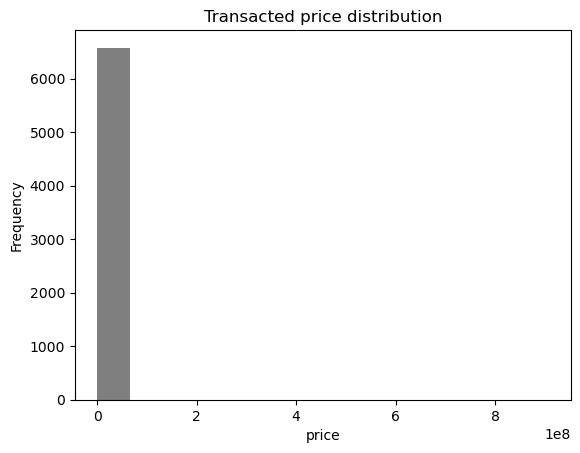

In [16]:
# Prepare a figure
plt.figure()

# Show a histogram, where the x-axis is transacted price (numeric),
# but divided up into 14 bins (numeric converted to categorical)
plt.hist(df4['Transacted Price ($)'], color='k', alpha=0.5, bins=14)

# Label the x and y-axes, and give the figure a title
plt.xlabel("price")
plt.ylabel("Frequency")
plt.title("Transacted price distribution")

Planning Region
Central Region       3.349783e+06
East Region          1.441746e+06
North East Region    1.417613e+06
North Region         1.264617e+06
West Region          1.296661e+06
Name: Transacted Price ($), dtype: float64


<Axes: xlabel='Planning Region'>

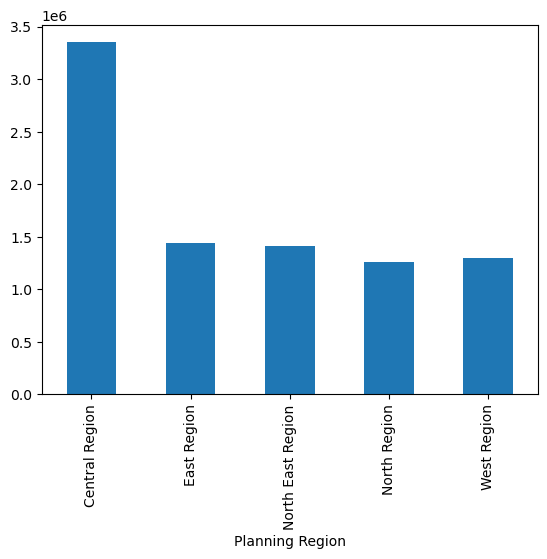

In [17]:
# First, group by 'Planning Region',
# then get only the 'Transacted Price ($)' column,
# then get average.
df_region = df4.groupby('Planning Region')['Transacted Price ($)'].mean()

# Print first 5 rows
print(df_region.head())

# Plot the result as a bar chart (x-axis is categorical)
df_region.plot.bar()